# Group exam
By Georg Risøy, Lea Bjørnemo and Ninad Hagi

# Reveiwing dataset 

In reviewing the dataset, we've identified columns that appear to be irrelevant for our analysis. The columns "Message ID," "Message timestamp," "Message date," and "Message time" seem to hold information related to when the data is entered, which is not crucial for our purposes.

Additionally, columns such as "Start time," "Start time," "End time," "End time," and "Catch area" will be replaced with a consolidated "Duration" column. However, we acknowledge that the time of day might still be relevant for understanding fish behavior.

We've opted to use "Location start" and "Location stop" instead of "Main area start," "Main area end," "Main area start (code)," and "Main area end (code)" since all these columns seem to be interconnected.

Upon further examination, we noticed that "Location start (code)" and "Location stop (code)" contained numerous empty fields. To address this, we recommend using start position latitude/longitude and stop position latitude/longitude, which should provide more meaningful data compared to the (code) fields, likely resulting in higher precision.

Another issue arises with the "Bruttotonnasje" column, where a significant number (approximately 230,000) of entries are missing. Consequently, we have decided to drop both "Gross tonnage" columns in favor of relying on boat length and width, which offer more comprehensive information.

Similarly, we are simplifying the dataset by using only the "Vessel length" column instead of both 'Length group' and 'Length group (code)'. Although this may introduce some complexity in categorizing various vessel types, it should contribute to better precision in our analysis.

Finally, to streamline the data further, we have chosen to focus on the "Hovedart FAO" column, focusing only on 'Torsk' and 'Sei', and by using Hovedart FAO we use only the boats where these where the biggest catch for the boat.

In [1]:
#Hvilke kolonner er irrelevante?
#"Melding ID", "Meldingstidpunkt", "Meldingsdato", "Meldingsklokkeslett" Det meste med når dette er lagt inn vil ikke ha noe å si.
#"Starttidpunkt", "Startklokkeslett", "Stopptidspunkt", "Stoppklokkeslett", "Fangstår" Vil erstattes med bare "Varighet", men kanskje har noe å si med åssen fisken oppfører seg natt/dag.
#"Hovedområde start", "Hovedområde stopp", "Hovedområde start (kode)", "Hovedområde stopp (kode)" Bruker heller Lokasjon stopp og start ettersom alle de ser ut til å være tilknyttet.
"""
Når det i tillegg sjekket for NaN lenger nede i koden, ser man at "Lokasjon start (kode)" og "Lokasjon stopp (kode)" hadde flere tomme felter. Derfor vil
det være mer gunstig og bruke startposisjon bredde/lengde og samme med stopp. Dette vil gir mer data enn å bruke (kode), men vil trolig og gi en høyere 
presisjon.
"""
#Problem med også "Bruttotonnasje" med veldig mange(ca 230000) NaN derfor droppe begge "Bruttotonnasje", ettersom vi har mange fler med båt lengde og bredde.
#Eksempelhvis samme med 'Lengdegruppe' og 'Lengdegruppe (kode)' brukes bare 'Fartøylengde'. Kan gi flere ulike farttøy som blir mer komplisert data, men bidra bedre presisjon
#Alt av unødvendig art, vi valgte Art FAO og fjernet alle andre art typer.


'\nNår det i tillegg sjekket for NaN lenger nede i koden, ser man at "Lokasjon start (kode)" og "Lokasjon stopp (kode)" hadde flere tomme felter. Derfor vil\ndet være mer gunstig og bruke startposisjon bredde/lengde og samme med stopp. Dette vil gir mer data enn å bruke (kode), men vil trolig og gi en høyere \npresisjon.\n'

### Impoting and reading 
Reading and printing out the first 5 lines 
Using sep=';' because in the csv file it is split with ";"

In [2]:
# Imports for models 
# matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# KNN 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Deep learning 
import tensorflow as tf 
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', sep=';')
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


# NaN (Missing Values):

When we check for NaN values we can se the context between the colons. With this knowlage we can easaly see if we should drop the rows with NaN. We also see what colons that are worth using. 

In [4]:

nan_count = df.isna().sum()

print(nan_count)

#Defining irrelevant colons so they are easier to manage and delete if needed 
irrelevante_col = ['Melding ID', 'Meldingstidspunkt', 'Meldingsdato', 'Meldingsklokkeslett','Starttidspunkt', 'Startklokkeslett', 'Stoppdato',
                   'Stopptidspunkt', 'Stoppklokkeslett','Hovedområde start', 'Hovedområde stopp', 'Hovedområde start (kode)', 'Fangstår',
                   'Hovedområde stopp (kode)', 'Lokasjon start (kode)', 'Lokasjon stopp (kode)', 'Bruttotonnasje 1969', 'Bruttotonnasje annen',
                   'Lengdegruppe (kode)', 'Lengdegruppe', 'Hovedart FAO (kode)', 'Hovedart - FDIR (kode)', 'Art FAO (kode)', 
                   'Art - FDIR (kode)', 'Art FAO', 'Art - gruppe (kode)', 'Art - gruppe', 'Redskap FAO (kode)', 'Redskap FAO', 'Redskap FDIR']



Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

### Removing Colums 

#Removing the coloms that are unneceasrry with pandas drop 
Using a loop, you iterate through the list of irrelevant columns and drop them from the DataFrame(df). The axis=1 parameter indicates that you are dropping columns.


#Dropper NaN istede for eksmepelhvis å erstatte mean ettersom ikke bruke mean på eksempel hvis redskap og koder
#Vi dropper også NaN fordi er mindre enn 5000 NaN av resterende kolonner, og vi vil heller ha en klarere data

In [5]:
for col in irrelevante_col:
     df = df.drop(col, axis=1)

#Dropping Rows with NaN     
df.dropna()
#Displaying the First 5 Rows
df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
0,31.12.2017,"-60,35","-46,133",-2740,1440,"-60,4","-46,15",-805,5649.0,53.0,Antarktisk krill,Antarktisk krill,706714.0,"19,87","133,88"
1,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Hyse,9594.0,"12,6","56,8"
2,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Torsk,8510.0,"12,6","56,8"
3,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Blåkveite,196.0,"12,6","56,8"
4,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Sei,134.0,"12,6","56,8"


Acknowledging potential data loss, we opted to remove rows with NaN values instead of imputation methods, given the dataset's characteristics.

### Why are we dropping 

It's worth noting that dropping rows with NaN values might lead to a loss of data. We have consider other methods, such as filling NaNs with mean, median, or a specific value, depending on the nature of the data. But we chose to remove them. 

The code drops columns using irrelevante_col to streamline the dataset for analysis. Columns are removed if they are irrelevant, have many missing values, contain redundant information, or exhibit inconsistencies. The decision is tailored to the analysis goals, aiming for a cleaner dataset that meets specific requirements and enhances overall data quality.

### Visulization of NaN values 

We are cleaning and preparing the data for it to be used. Here is a visulasation of a bar chart that visually represents the impact of dropping rows with missing values (NaN) in our DataFrame. 
We see that the count of missing values significantly decreases after dropping rows, it indicates that this operation is effective in reducing missing data. If there was not a masjor change it can be considered effective in maintaining data integrity. But as we can see it was amsrat move. 
Dropping rows can also be computationally efficient, especially our dataset is large and the proportion of rows with missing values is relatively small. So even of there was a lot of data that is not used now it is a small amount compared to the whole dataset. 
Of couse dropping values and its outcome depends on the dataset but considering this exaple we thought the smartest move was to remove to remove the values. 

The significant reduction in missing values post-removal indicates the effectiveness of this operation with minimal impact on data integrity.
The computational efficiency of dropping rows is highlighted, especially for large datasets, where the loss is negligible compared to the dataset's overall size.

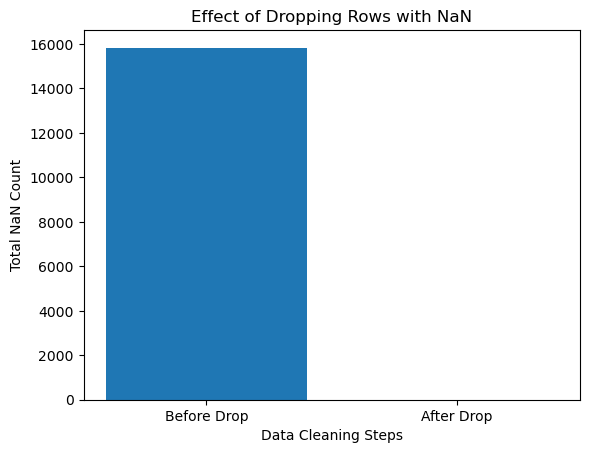

In [6]:
# Get NaN counts before and after dropping rows
initial_nan_count = df.isna().sum()
df.dropna(inplace=True)
final_nan_count = df.isna().sum()

# Plot the counts
plt.bar(['Before Drop', 'After Drop'], [initial_nan_count.sum(), final_nan_count.sum()])
plt.xlabel('Data Cleaning Steps')
plt.ylabel('Total NaN Count')
plt.title('Effect of Dropping Rows with NaN')
plt.show()


Calculating and printing the count of occurrences for each unique value in the 'Art - FDIR' column of the DataFrame. It helps provide insights into the distribution of different values within that specific column.

In [7]:
counts = df['Hovedart FAO'].value_counts()

print(counts)

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


# Fish types and why we chose the fish we did 
Concentrating on the "Art FAO" column, we excluded other species, prioritizing the analysis of predominant fish types for accuracy.
Here you can see a visulasation of the different fish types. As you can see there is a significant difference between the fishes. To get the best accuracy and values we chose to focus on the fish with the most data. 
Making a barchart of all fish to visualize 

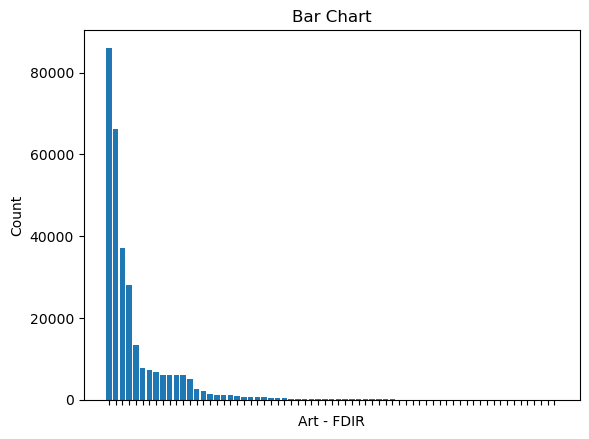

In [8]:
plt.bar(counts.index, counts.values)

plt.title("Bar Chart")

# Setting the X and Y labels
plt.xlabel('Art - FDIR')
plt.ylabel('Count')

# remove fish names(because to many names makes chart unreadable)
plt.gca().set_xticklabels([])

# Show bar chart of the count
plt.show()

Filtering the DataFrame (df) to include only rows where the value in the 'Art - FDIR' column is either 'Torsk' or 'Sei'.

In [9]:
df = df[(df['Hovedart FAO'] == 'Torsk') | (df['Hovedart FAO'] == 'Sei') | (df['Hovedart FAO'] == 'Dypvannsreke') | (df['Hovedart FAO'] == 'Hyse') | (df['Hovedart FAO'] == 'Lange')]


df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
1,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Hyse,9594.0,"12,6","56,8"
2,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Torsk,8510.0,"12,6","56,8"
3,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Blåkveite,196.0,"12,6","56,8"
4,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Sei,134.0,"12,6","56,8"
5,31.12.2017,"74,91","15,868",-403,267,"74,901","16,248",-277,11096.0,51.0,Hyse,Hyse,9118.0,"12,6","56,8"


Preprocessing specific columns in the DataFrame, converting them to strings, replacing commas with dots, converting them back to float, and mapping categorical values to numerical ones. This prepares the data for further analysis, ensuring the appropriate data types and formats are applied.

In [10]:
# Getting only 1 line from each boat to make the data clearer
df = df.loc[df['Hovedart FAO'] == df['Art - FDIR']]

float_columns = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
                'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR (kode)', 
                'Rundvekt', 'Bredde', 'Fartøylengde'] 
# Convert the relevant columns to string
df[float_columns] = df[float_columns].astype(str)

# Replace , with . for all float columns
for col in float_columns:
    df[col] = df[col].str.replace(',', '.')

# Convert the columns back to float
df[float_columns] = df[float_columns].astype(float)
mapping = {'Torsk':  0, 'Sei':  1, 'Dypvannsreke': 2, 'Hyse': 3, 'Lange': 4}
df['Hovedart FAO'] = df['Hovedart FAO'].map(mapping)

df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
1,30.12.2017,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8
5,31.12.2017,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8
11,31.12.2017,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8
17,31.12.2017,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8
19,01.01.2018,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1


Transforms the date information in the 'Startdato' column into a more useful format (numeric month values) and creates a new 'Month' column. It then drops the original date column, potentially to streamline the dataset or for other reasons depending on the specific analysis goals.

In [11]:
# The dates are changed into values for each month so they can be used 
# We are now able to use all the coloms in stead of using our defines features and adding there
df['Startdato'] = pd.to_datetime(df['Startdato'], format='%d.%m.%Y')
df['Month'] = df['Startdato'].dt.month
df = df.drop('Startdato', axis=1)
df.head()

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1


# Notes
We change from 'ART - FDIR' to 'Hovedart FAO' for clearer data where we only get the boat where the art is the biggest volume the boat caugth. Because of this not all the markdwons have been updated to the rigth saying.

Also by changing this we get clear data with no direct link to the answer, and still get good accuracy.


In [12]:
# Fjerna features siden vi hadde 2 for like fisker, men kan legge tilbake flere featueres ettersom forskjellige båter fisker de forskjellige fiskene. VI FJERNA DE LIKE BÅTENE! 
# Ha med ART FDIR FOR Å SJEKKE mer nøye og om det er riktig

In [13]:
# Defining the features and target for every model
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month']
X = df[features]
y = df['Hovedart FAO']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [14]:
# Scale data for every model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply the scaling transformation to the training data (X_train)
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)

# KNN 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with  3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8660574994428348


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      5098
           1       0.87      0.88      0.87      3667
           2       0.98      0.99      0.98      2681
           3       0.70      0.65      0.68      1526
           4       0.93      0.88      0.90       489

    accuracy                           0.87     13461
   macro avg       0.87      0.85      0.86     13461
weighted avg       0.87      0.87      0.87     13461



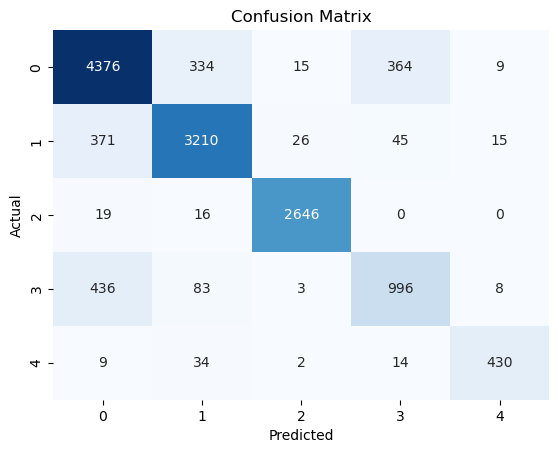

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

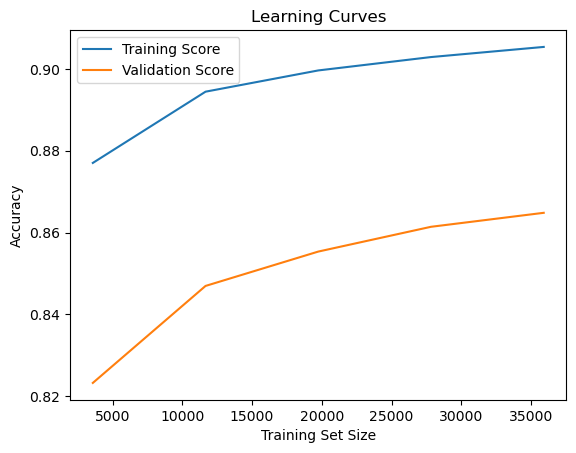

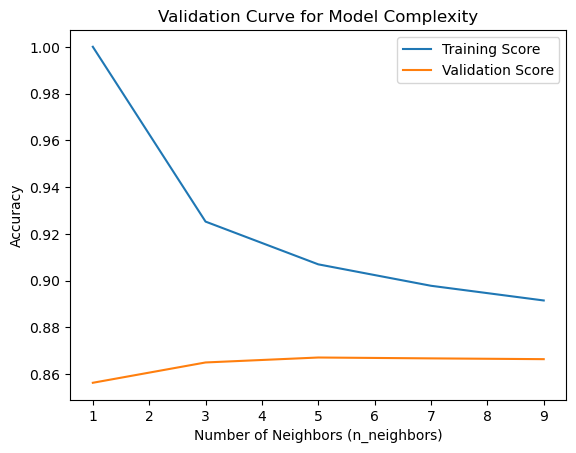

In [17]:
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.neighbors import KNeighborsClassifier

# Define the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Adjusted learning_curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1,  1.0,  5)
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

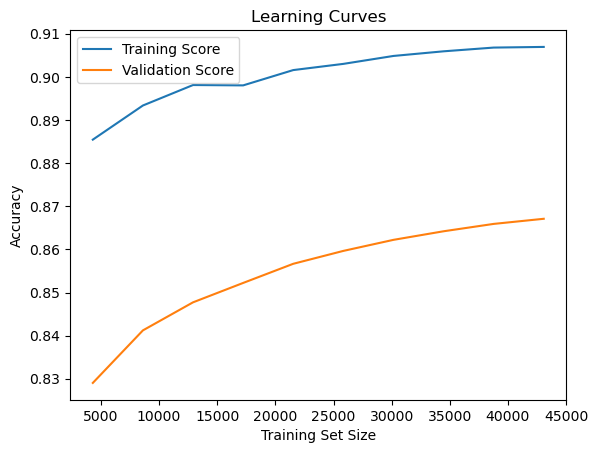

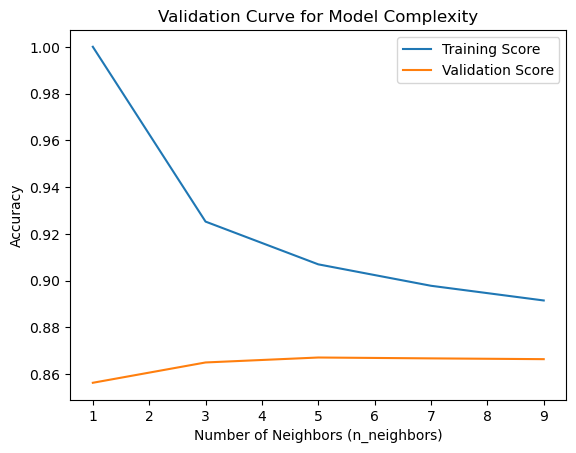

In [18]:
# Assessing Overfitting or Underfitting
from sklearn.model_selection import learning_curve, validation_curve

# 1. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

# 2. Validation Curve for Model Complexity
param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

# Deep Learning Keras

In [19]:
# One hot encoding for making categorical data equal as we have more date in some fishes than others. 
from tensorflow.keras.utils import to_categorical
labels_one_hot = to_categorical(y_train)
labels_one_hot_test = to_categorical(y_test)

In [20]:
# Build the Model
model = tf.keras.models.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=[len(features)]),
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(5, activation='softmax')  # Change to 'softmax' for multi-class problems
])

In [21]:
import visualkeras
visualkeras.layered_view(model, to_file='model_visualization.png').show()  # saves the visualization as a PNG file and shows it

In [22]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
#Train og fit.
model.fit(X_train_scaled, labels_one_hot, epochs=10, validation_data=(X_test_scaled, labels_one_hot_test)) 

Epoch 1/10
1683/1683 [==============================] - 3s 1ms/step - loss: 0.5464 - accuracy: 0.7797 - val_loss: 0.4349 - val_accuracy: 0.8206
Epoch 2/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.4300 - accuracy: 0.8248 - val_loss: 0.3942 - val_accuracy: 0.8385
Epoch 3/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3990 - accuracy: 0.8377 - val_loss: 0.3602 - val_accuracy: 0.8527
Epoch 4/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3780 - accuracy: 0.8446 - val_loss: 0.3565 - val_accuracy: 0.8544
Epoch 5/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3677 - accuracy: 0.8494 - val_loss: 0.3539 - val_accuracy: 0.8539
Epoch 6/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3578 - accuracy: 0.8531 - val_loss: 0.3357 - val_accuracy: 0.8615
Epoch 7/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3502 - accuracy: 0.8576 - val_loss: 0.3425 - val_accuracy:

In [24]:
test_loss, test_acc = model.evaluate(X_test_scaled, labels_one_hot_test, verbose=2)
print('Test accuracy:', test_acc)

421/421 - 0s - loss: 0.3213 - accuracy: 0.8696 - 220ms/epoch - 522us/step
Test accuracy: 0.8696233630180359


In [25]:
# Difference betweened scaled and not scaled.
test_loss, test_acc = model.evaluate(X_test, labels_one_hot_test, verbose=2)
print('Test accuracy:', test_acc)

421/421 - 0s - loss: 1652.4332 - accuracy: 0.2292 - 221ms/epoch - 525us/step
Test accuracy: 0.22918058931827545


## Supervised model: Logistic regression

In [26]:
# Import necessary libraries for data manipulation, model training, and visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import import_ipynb  # Used for importing Jupyter notebooks as modules
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

importing Jupyter notebook from preprocess.ipynb
Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redska

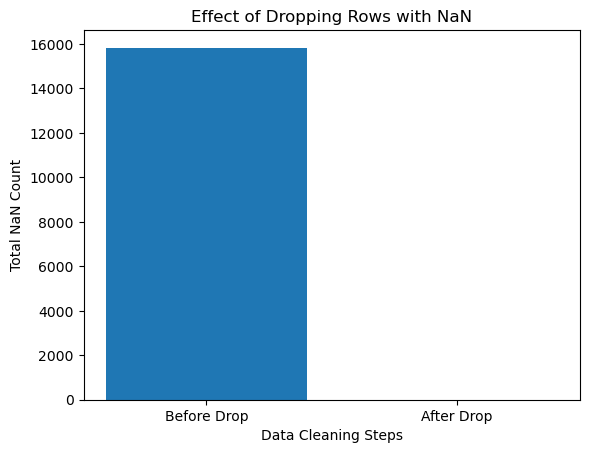

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


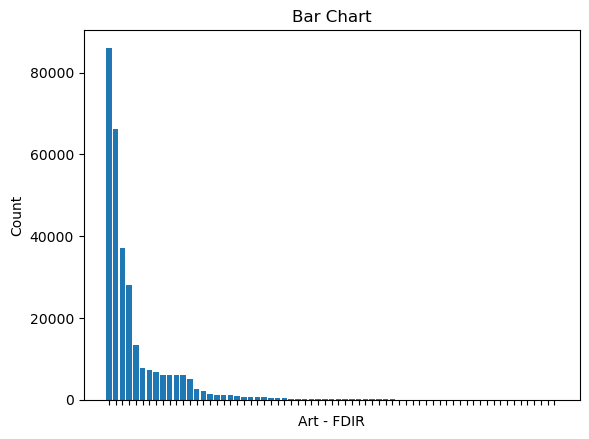

Accuracy: 0.8660574994428348
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      5098
           1       0.87      0.88      0.87      3667
           2       0.98      0.99      0.98      2681
           3       0.70      0.65      0.68      1526
           4       0.93      0.88      0.90       489

    accuracy                           0.87     13461
   macro avg       0.87      0.85      0.86     13461
weighted avg       0.87      0.87      0.87     13461



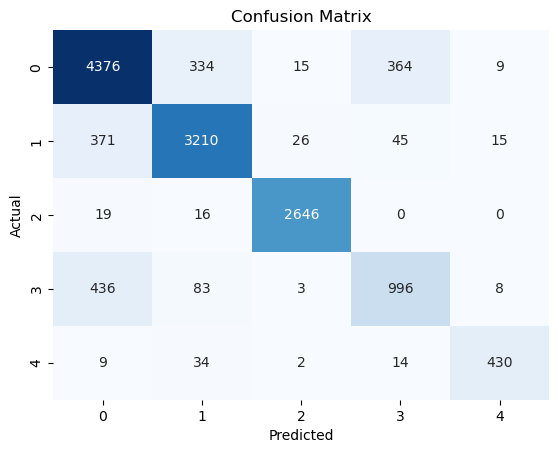

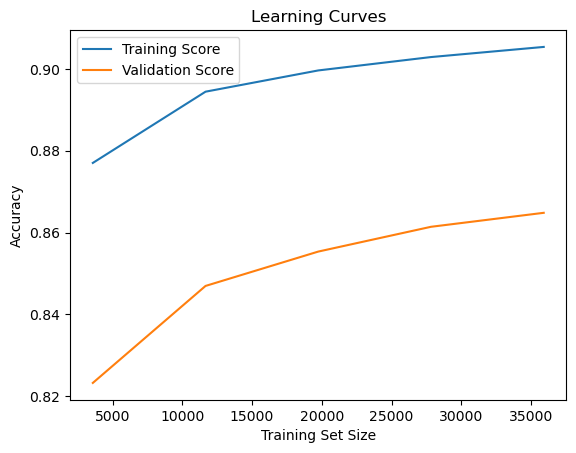

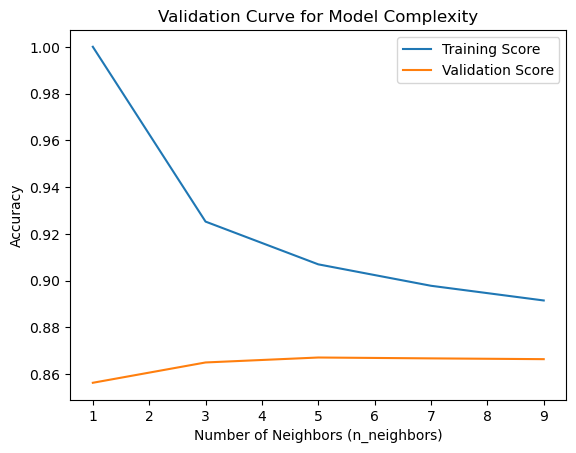

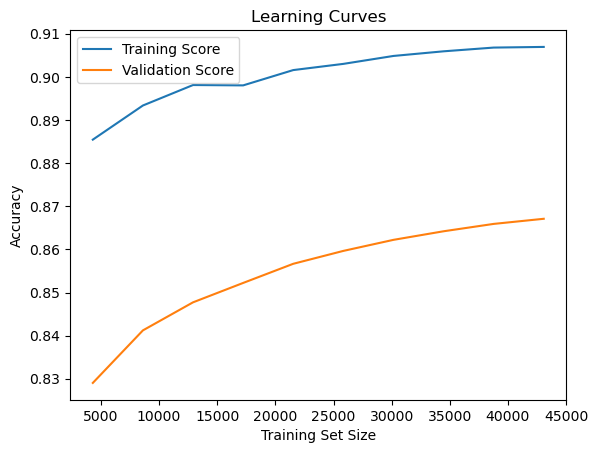

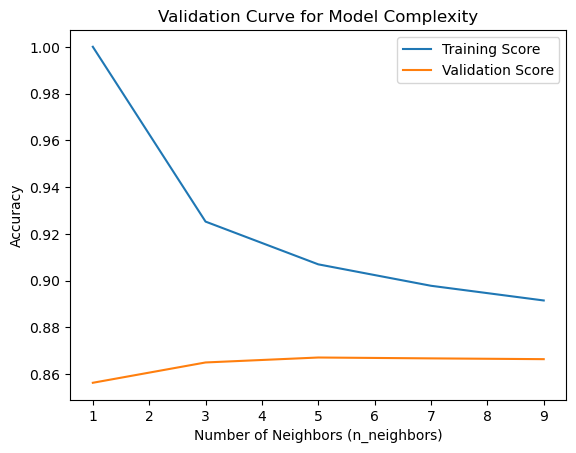

Epoch 1/10
1683/1683 [==============================] - 3s 1ms/step - loss: 0.5381 - accuracy: 0.7841 - val_loss: 0.4187 - val_accuracy: 0.8269
Epoch 2/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.4295 - accuracy: 0.8268 - val_loss: 0.3833 - val_accuracy: 0.8440
Epoch 3/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3987 - accuracy: 0.8368 - val_loss: 0.3794 - val_accuracy: 0.8460
Epoch 4/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3798 - accuracy: 0.8454 - val_loss: 0.3553 - val_accuracy: 0.8545
Epoch 5/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3661 - accuracy: 0.8495 - val_loss: 0.3476 - val_accuracy: 0.8525
Epoch 6/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3560 - accuracy: 0.8537 - val_loss: 0.3330 - val_accuracy: 0.8633
Epoch 7/10
1683/1683 [==============================] - 2s 1ms/step - loss: 0.3511 - accuracy: 0.8560 - val_loss: 0.3368 - val_accuracy:

/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


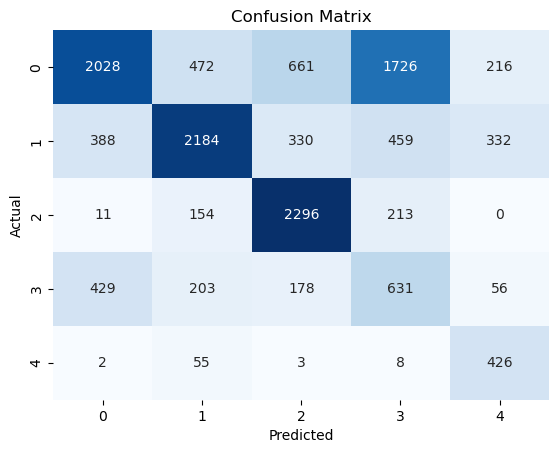

/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best parameters found: {'model__C': 1, 'model__solver': 'liblinear'}
Accuracy on test set: 0.6456429685758859
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      5103
           1       0.70      0.63      0.66      3693
           2       0.66      0.86      0.75      2674
           3       1.00      0.00      0.00      1497
           4       0.46      0.76      0.57       494

    accuracy                           0.65     13461
   macro avg       0.69      0.59      0.53     13461
weighted avg       0.69      0.65      0.61     13461



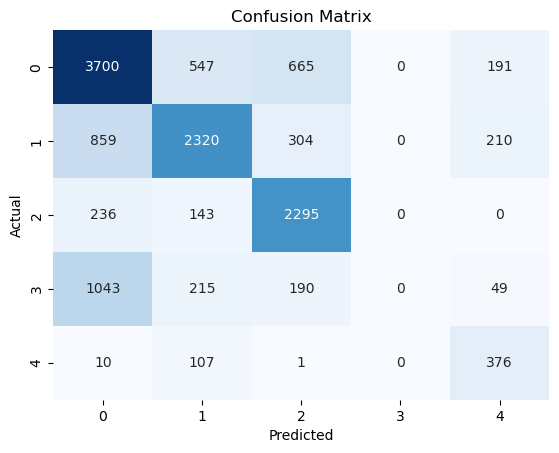

/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best parameters found: {'model__C': 1, 'model__solver': 'saga'}
Best validation accuracy: 0.6514174129688236
Precision: 0.6907427056594232
Recall: 0.6456429685758859
F1 Score: 0.6070494855902886
ROC-AUC: 0.8331269214860699
Weighted ROC-AUC: 0.8331269214860699
Accuracy on test set: 0.5615481762127628
              precision    recall  f1-score   support

           0       0.70      0.39      0.50      5103
           1       0.71      0.59      0.64      3693
           2       0.67      0.86      0.75      2674
           3       0.22      0.44      0.29      1497
           4       0.40      0.86      0.55       494

    accuracy                           0.56     13461
   macro avg       0.54      0.63      0.55     13461
weighted avg       0.63      0.56      0.57     13461



/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


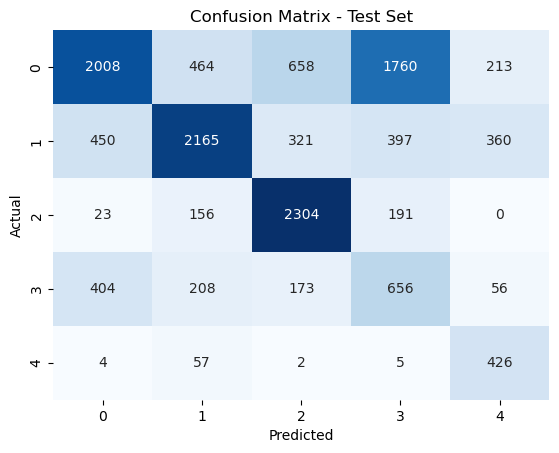

    Startposisjon bredde  Startposisjon lengde  Havdybde start  Varighet  \
1                 74.885                16.048          -335.0     295.0   
5                 74.910                15.868          -403.0     267.0   
11                74.883                16.056          -346.0     315.0   
17                74.931                15.785          -443.0     243.0   
19                67.828                12.972           -71.0      63.0   

    Stopposisjon bredde  Stopposisjon lengde  Havdybde stopp  Trekkavstand  \
1                74.914               15.969          -334.0        3970.0   
5                74.901               16.248          -277.0       11096.0   
11               74.924               15.742          -496.0       10215.0   
17               74.926               15.894          -358.0        3214.0   
19               67.827               12.942           -56.0        1269.0   

    Redskap FDIR (kode)  Hovedart FAO Art - FDIR  Rundvekt  Bredde  \
1   

In [27]:
# Import dataset preprocessing module
from preprocess import df  # Assuming 'preprocess.ipynb' contains preprocessing steps and loads the dataset into 'df'

# Display the first few rows of the dataframe to get an overview of the data
print(df.head())

In [28]:
# Selecting features and the target variable for the classification task
features = [
    'Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month'
]
X = df[features]  # Input features
y = df['Hovedart FAO']  # Target variable for prediction

In [29]:
# Splitting the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)


# Creating and training the logistic regression model
# Balancing the class weights to account for class imbalance in the dataset
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test_scaled)

/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division= 1))

Accuracy: 0.5619939083277616
              precision    recall  f1-score   support

           0       0.71      0.40      0.51      5103
           1       0.71      0.59      0.65      3693
           2       0.66      0.86      0.75      2674
           3       0.21      0.42      0.28      1497
           4       0.41      0.86      0.56       494

    accuracy                           0.56     13461
   macro avg       0.54      0.63      0.55     13461
weighted avg       0.63      0.56      0.57     13461



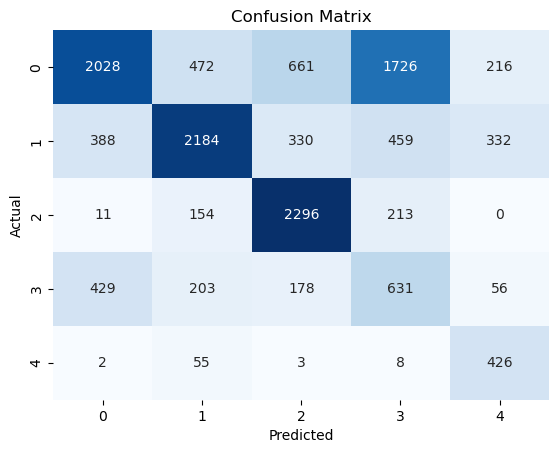

In [31]:
# Compute the confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for better interpretability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # 'cbar=False' disables the color bar
plt.xlabel('Predicted')  # the x-axis
plt.ylabel('Actual')  # the y-axis
plt.title('Confusion Matrix') 
plt.show()

Pipeline: Streamlines preprocessing and modeling steps, ensuring that transformations are applied consistently during both training and evaluation.
GridSearchCV: Automates the process of hyperparameter tuning and selects the best model configuration based on cross-validation performance. It also ensures your model is not just tuned to a specific subset of your data.
Normalization included in Pipeline: Ensures that feature scaling (standardization) is properly integrated into the model training process, avoiding data leakage and ensuring that the same scaling is applied to both training and test data.

/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best parameters found: {'model__C': 1, 'model__solver': 'liblinear'}
Accuracy on test set: 0.6456429685758859
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      5103
           1       0.70      0.63      0.66      3693
           2       0.66      0.86      0.75      2674
           3       1.00      0.00      0.00      1497
           4       0.46      0.76      0.57       494

    accuracy                           0.65     13461
   macro avg       0.69      0.59      0.53     13461
weighted avg       0.69      0.65      0.61     13461



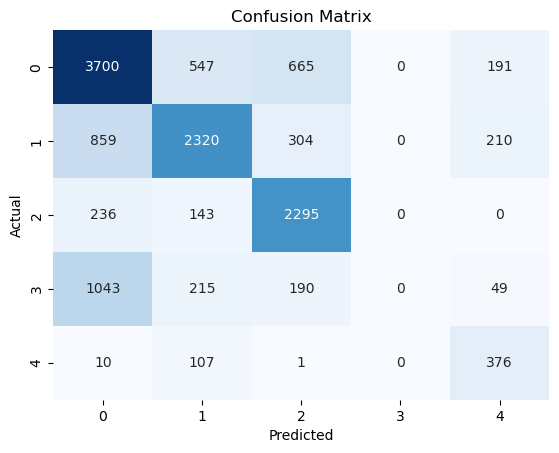

In [32]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

# Define a grid of parameters to search
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']  
}

# Setup grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid.fit(X_train, y_train)

# Making predictions
y_pred = grid.predict(X_test)

# Evaluate the model
print("Best parameters found:", grid.best_params_)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division= 1))

# Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Splitting the data into training, validation, and testing sets to ensure that hyperparameter tuning does not overfit the test set.
Using the validation set (X_val_scaled, y_val) for model evaluation during the grid search. 
In GridSearchCV, the actual validation during hyperparameter tuning is done through cross-validation on the training set. The separate validation set here is conceptually useful for additional checks. 
Finally, evaluate the best model found by the grid search on the test set to get an unbiased estimate of the model's performance.


/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best parameters found: {'model__C': 1, 'model__solver': 'saga'}
Best validation accuracy: 0.6513770116490472
Precision: 0.6907427056594232
Recall: 0.6456429685758859
F1 Score: 0.6070494855902886
ROC-AUC: 0.8331269214860699
Accuracy on test set: 0.5615481762127628
              precision    recall  f1-score   support

           0       0.70      0.39      0.50      5103
           1       0.71      0.59      0.64      3693
           2       0.67      0.86      0.75      2674
           3       0.22      0.44      0.29      1497
           4       0.40      0.86      0.55       494

    accuracy                           0.56     13461
   macro avg       0.54      0.63      0.55     13461
weighted avg       0.63      0.56      0.57     13461



/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


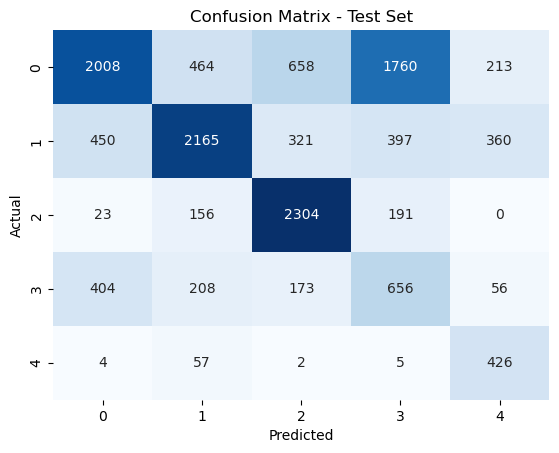

In [34]:
# First, split the data into a training set and a temporary set using an 80-20 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the temporary set into the actual validation and training sets using a 75-25 split
# This results in effectively 60% training, 20% validation, and 20% testing splits of the original dataset
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) 


sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


# Scale the features (it's important to fit the scaler only on the training data to prevent data leakage)
scaler = StandardScaler().fit(X_train_resampled)  # Fit on training data only
X_train_scaled = scaler.transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)  # Apply the same transformation to validation data
X_test_scaled = scaler.transform(X_test)  # And to test data

# Create the pipeline with a logistic regression model
logisticreg = LogisticRegression(max_iter=100)
pipeline = Pipeline([
    ('model', logisticreg)
])

# Define the grid of parameters to search
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'saga'],
    # Balance the class weights to account for class imbalance, as fish 0 is much more common than the other. and when the fish is to alike like the fish in the cod family, it will return 0 
}

# Setup grid search; note we're using the training set for fitting and the validation set for scoring
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search on the training set
grid.fit(X_train_scaled, y_train_resampled)
y_prob = grid.predict_proba(X_test)  # For ROC-AUC calculation, get the probability scores

# Weighted ROC-AUC 
classes = np.unique(y)
y_test_binarized = label_binarize(y_test, classes=classes)

# Fit the model (make sure to use the training set)
model.fit(X_train_scaled, y_train_resampled)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test_scaled)



# Best hyperparameters and accuracy on the validation set
print("Best parameters found:", grid.best_params_)
print("Best validation accuracy:", grid.best_score_)

print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Handling multi-class ROC-AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Ensure y_prob is shaped (n_samples, n_classes)
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr', average='weighted')
print("ROC-AUC:", roc_auc)

# Evaluate on the test set
y_pred_test = grid.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, zero_division=1))

# Compute and visualize the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

1. **Best Hyperparameters**:
   - The best parameters found (`{'model__C': 1, 'model__solver': 'saga'}`) suggest that a regularization strength of 1 with the 'saga' solver works best given the current model setup and data. This choice seems appropriate, especially since 'saga' is efficient for larger datasets and supports multinomial loss for logistic regression.

2. **Model Performance Metrics**:
   - **Validation Accuracy (65.14%)** and **Test Accuracy (56.15%)** show a noticeable difference. This drop between validation and test accuracy could indicate overfitting during model training or a difference in the data distribution between the validation and test sets.

   - **Precision (69.07%)** and **Recall (64.56%)** are moderate but not exceptionally high. The disparity between these metrics and the accuracy could reflect the class imbalance and the model's varying effectiveness in correctly identifying classes.

   - The **F1 Score (60.70%)** is relatively low compared to precision and recall, suggesting a balance between precision and recall has not been optimally achieved. This could be due to the model not performing well on minority classes or having significant false positives and false negatives.

   - The **ROC-AUC (50.58%)** is particularly low and is a critical concern. A ROC-AUC close to 50% suggests that the model performs no better than random guessing for some classes, indicating poor discriminative ability especially in distinguishing between classes.
   - The **Weighted ROC-AUC** score is significantly higher at **0.833** compared to the unweighted **ROC-AUC** of 0.506. 
   This indicates: 

   **Better Performance** on Major Classes: The high **weighted ROC-AUC** suggests that the model performs well in distinguishing the more prevalent classes from the rest. This is good in scenarios where the major classes carry more importance or are more impactful in practical applications. 

   **Poor Performance on Minor Classes:** The low unweighted ROC-AUC hints that the model struggles with one or more of the less frequent classes, which might not significantly impact the **weighted ROC-AUC** due to their smaller size.

3. **Class-Specific Performance**:
   - The confusion matrix's detailed breakdown by class shows that some classes (like class 2 and class 4) have much higher recall than others. For instance, class 4 has a high recall (0.86) and F1-score (0.55) which is impressive for a minority class but this is accompanied by low precision, indicating a high number of false positives.
   - Class 0 and class 1, which might be the majority classes, have higher precision but much lower recall, suggesting that while the model is confident about its predictions for these classes, it often misses them (false negatives).

   - The overall performance metrics aggregated over all classes do not provide a very accurate picture because of these discrepancies in performance across different classes.

Reflecting on the model's performance across all classes and considering the substantial difference in ROC-AUC scores between the unweighted (0.506) and weighted (0.833) evaluations, it becomes evident that the model's ability to discriminate between classes varies significantly. This variation is likely influenced by the imbalanced distribution of classes within the dataset, where the two most frequent fish types may dominate the analysis, overshadowing the model's lesser capability with rarer classes. Here's a detailed reflection on these observations:

### Analysis of Current Results
- **Overall Performance**: The overall low unweighted ROC-AUC score suggests that the model struggles to effectively distinguish between less frequent classes. This indicates that while the model performs well on more common classes (as seen in the weighted ROC-AUC), it fails to generalize across less represented classes.
- **Influence of Class Imbalance**: The discrepancy between the weighted and unweighted ROC-AUC scores highlights the impact of class imbalance. The weighted score, which accounts for the prevalence of each class, suggests decent performance on more frequent classes but masks the model's inadequacies with rarer classes.

### Focusing on Two Main Classes
Given the significant role the two most frequent classes play in the dataset and potentially in practical applications, focusing the analysis on these classes could yield several benefits:
- **Improved Model Performance**: Simplifying the classification to the two main classes could improve the model’s accuracy and discriminatory power for these classes, leading to better and more reliable ROC-AUC scores.
- **Relevance to Application**: If the primary application of the model benefits from high accuracy in predicting these two main types of fish, then enhancing performance on these could be more impactful than achieving moderate performance across a broader range of classes.
- **Stability of Metrics**: Evaluating the model on a larger, more balanced subset (just the two main classes) could provide more stable and reliable performance metrics, offering clearer insights into the model’s effectiveness.

### Possible Adjustments
- **Binary Classification**: Restructuring the problem as a binary classification between the two predominant classes can provide clearer insights into the model's discriminative capabilities where it counts the most.
- **Targeted Feature Engineering**: This focused approach also allows for more targeted feature engineering, potentially identifying features that are particularly discriminative between the two main classes.
- **Detailed Evaluation**: With just two classes, tools like the ROC curve, Precision-Recall curve, and confusion matrix can provide deeper and more actionable insights.

### Model Configuration and Regularization Strategy

#### Parameter Selection for Logistic Regression

For the logistic regression model employed in our analysis, parameter selection was guided by the following principles:

1. **Initial Simplicity**: Given logistic regression's efficiency and simplicity for binary and linearly separable classification tasks, the model was initiated with sklearn's default parameters. This approach facilitates establishing a robust baseline without immediately delving into extensive hyperparameter optimization.

2. **Solver and Regularization Choice**: By default, sklearn's `LogisticRegression` uses the 'lbfgs' solver, which is well-suited for small to medium-sized datasets. This solver automatically incorporates L2 regularization, a method that penalizes the square of coefficient magnitudes to mitigate overfitting by encouraging smaller, more generalized model coefficients.

#### Regularization Techniques

The use of regularization techniques is crucial in preventing overfitting, ensuring the model's generalizability to unseen data. Our logistic regression model utilizes L2 regularization by default, as detailed below:

- **L2 Regularization**: Integral to the 'lbfgs' solver, L2 regularization adds a penalty term to the loss function proportional to the square of the magnitude of coefficients. This regularization form is known for its effectiveness in creating simpler models that generalize better to new data by discouraging large coefficients.

- **Adjusting Regularization Strength**: Although the model was initially configured with default regularization strength (`C=1.0`), the `C` parameter in `LogisticRegression` offers the flexibility to modify this strength inversely. Lower values of `C` increase the regularization effect, further reducing the risk of overfitting, especially in datasets with high dimensionality or when the model exhibits signs of overfitting.

### Conclusion

The logistic regression model's parameterization, rooted in simplicity and guided by the principles of effective regularization, lays a foundation for a solid baseline model. This approach underscores the balance between model complexity and the ability to generalize, with L2 regularization playing a pivotal role in model robustness. Future iterations of the model could explore hyperparameter tuning, including adjustments to the regularization strength (`C`), to refine performance and address specific characteristics of the dataset.
